In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [0]:
"""training model for simple linear regression

features - numpy array of x variables
targets - numpy array of y variables
coefficients - numpy array of the weights of the intercept and x variables
return - the final coefficients (y_int, slope) as an array
"""
def train(features, targets):
  # Compute mean values for x and y
  mean_x = np.mean(features) 
  mean_y = np.mean(targets)
  
  num_rows = len(targets)
  
  numer = 0
  denom = 0
  for i in range(num_rows):
    # Compute the difference between the current x, y and their respective means
    diff_from_mean_x = features[i] - mean_x 
    diff_from_mean_y = targets[i] - mean_y
    
    # add del_x * del_y to the numerator
    numer += (diff_from_mean_x) * (diff_from_mean_y)
    # add (del_x)^2 to the denominator
    denom += (diff_from_mean_x) ** 2
  
  # Compute coefficients
  slope = numer / denom
  y_int = mean_y - (slope * mean_x)
  coefficients = [y_int, slope]
    
  return coefficients

In [0]:
"""Tests the accuracy of our model (use different data than train)

features - the test data features
targets - the actual values from test data
coefficients - the final coefficients from our model as an array
return - root mean square error as a float - lower is better
return - R^2 accuracy score (0.0-1.0) - higher is better
"""
def test(features, targets, coefficients):
  y_int = coefficients[0]
  slope = coefficients[1]
  num_rows = len(targets)
  
  # Compute root mean square error of model
  del_sq = 0.0
  for i in range(num_rows):
    prediction = y_int + slope * features[i]
    del_sq += (targets[i] - prediction) ** 2
  
  rmse = np.sqrt(del_sq / num_rows)
  
  # Compute R^2 score of model
  mean_y = np.mean(targets)
  
  sum_squares_tot = 0.0
  sum_squares_resid = 0.0
  for i in range(num_rows):
    prediction = y_int + slope * features[i]
    sum_squares_tot += (targets[i] - mean_y) ** 2
    sum_squares_resid += (targets[i] - prediction) ** 2
  R2_accuracy = 1 - (sum_squares_resid / sum_squares_tot)
  
  return rmse, R2_accuracy

In [9]:
data = pd.read_csv("https://s3.amazonaws.com/uiuc-adsa-fa18/student.csv")
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


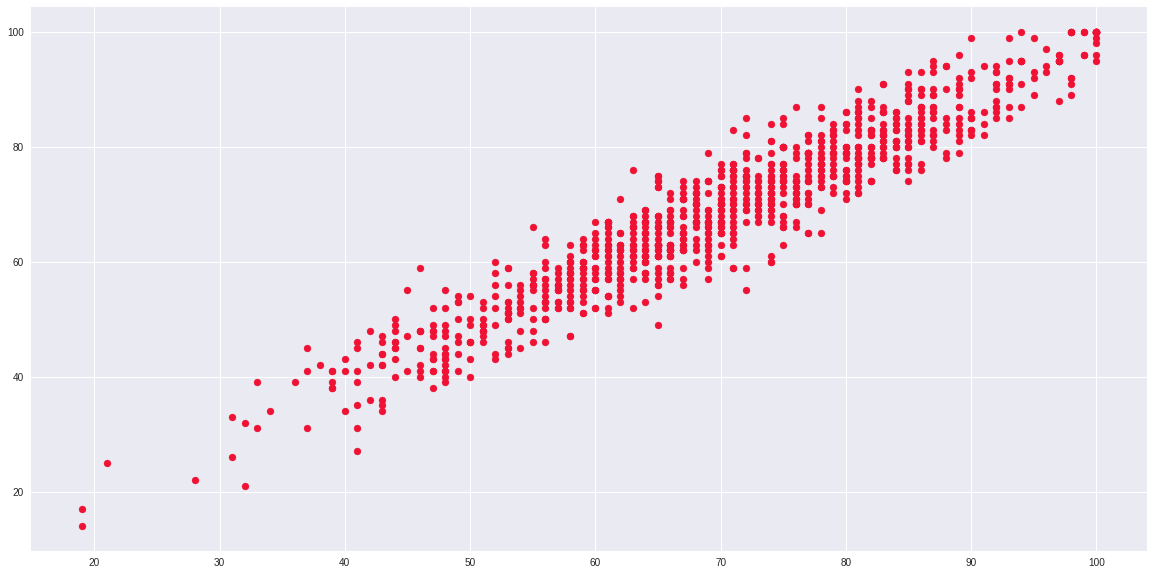

In [19]:
# Ploting the scores as scatter plot
plt.scatter(data['Reading'].values, data['Writing'].values, color='#ef1234')
plt.show()

In [15]:
train_data = data.head(700)

features = train_data['Reading'].values
targets = train_data['Writing'].values

coefficients = train(features, targets)

print(coefficients)


[0.23575776402940107, 0.9813803397140457]


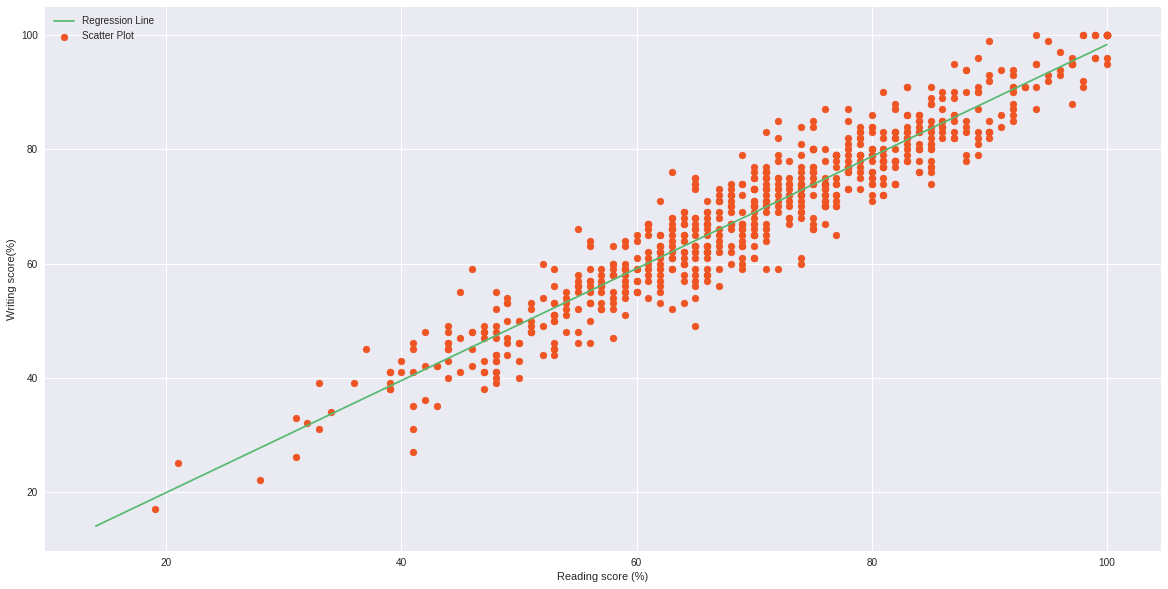

In [25]:
# Plotting Values and Regression Line

max_x = np.max(features)
min_x = np.min(features) - 5
y_int = coefficients[0]
slope = coefficients[1]

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = y_int + slope * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')

# Ploting Scatter Points
plt.scatter(features, targets, c='#ef5423', label='Scatter Plot')

plt.xlabel('Reading score (%)')
plt.ylabel('Writing score(%)')
plt.legend()
plt.show()

In [28]:
test_data = data.tail(300)

test_features = test_data['Reading'].values
test_targets = test_data['Writing'].values

rmse, R2_score = test(test_features, test_targets, coefficients)
print(rmse)
print(R2_score)

4.675703312619101
0.9055418947448172
